#### build a log regression from scratch

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [7]:
class LogisticRegression:
    """Logistic regression model for binary classification."""
    def __init__(self, learning_rate=0.0001, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.params = None
        self.loss_history = []

    @staticmethod
    def _sigmoid(x):
        """Compute the sigmoid of x."""
        return 1 / (1 + np.exp(-x))

    def _compute_loss(self, y, y_predicted):
        """Compute the binary cross-entropy loss."""
        return -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))

    def _compute_gradients(self, X, y, y_predicted):
        """Compute the gradients of the loss function."""
        n_samples = X.shape[0]
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)
        return dw, db

    def fit(self, X, y):
        """Fit the logistic regression model to the data."""
        n_features = X.shape[1]
        self.params = ModelParameters(n_features, self.learning_rate)

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.params.weights) + self.params.bias
            y_predicted = self._sigmoid(linear_model)

            loss = self._compute_loss(y, y_predicted)
            self.loss_history.append(loss)

            dw, db = self._compute_gradients(X, y, y_predicted)
            self.params.update_parameters(dw, db)
            
    def predict(self, X):
        """Predict binary labels for a set of inputs."""
        linear_model = np.dot(X, self.params.weights) + self.params.bias
        y_predicted = self._sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [3]:
class ModelParameters:
    def __init__(self, n_features, learning_rate):
        self.learning_rate = learning_rate
        self.weights = np.zeros(n_features)
        self.bias = 0
    
    def update_parameters(self, dw, db):
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

In [4]:
class LossPlotter:
    """Class for plotting loss over training iterations."""
    def __init__(self, loss_history):
        self.loss_history = loss_history

    def plot(self):
        """Plot the loss over iterations."""
        plt.plot(self.loss_history)
        plt.title('Loss over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()


In [5]:
def load_data():
    """Load and split the dataset."""
    bc = datasets.load_breast_cancer()
    X, y = bc.data, bc.target
    return train_test_split(X, y, test_size=0.2, random_state=1234)


/var/folders/jx/gmf9hmt9121dk7k_2zkkvj1w0000gn/T/ipykernel_71223/2415115368.py:16: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
/var/folders/jx/gmf9hmt9121dk7k_2zkkvj1w0000gn/T/ipykernel_71223/2415115368.py:16: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))


Accuracy: 0.9298


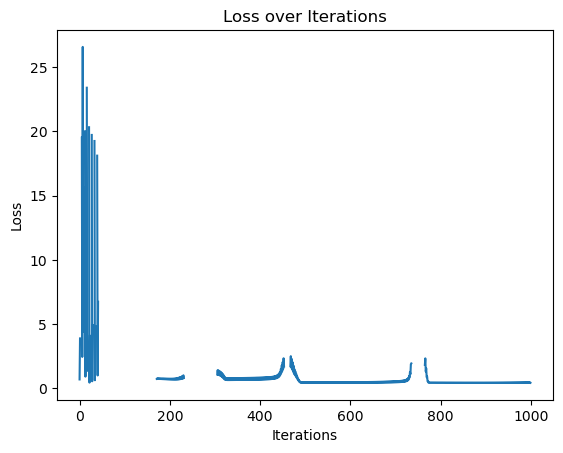

In [9]:
if __name__ == "__main__":
    X_train, X_test, y_train, y_test = load_data()

    # Training the model
    clf = LogisticRegression(learning_rate=0.0001, iterations=1000)
    clf.fit(X_train, y_train)

    # Predicting
    predictions = clf.predict(X_test)

    # Evaluation
    accuracy = np.mean(predictions == y_test)
    print(f"Accuracy: {accuracy:.4f}")

    # Plotting loss
    plotter = LossPlotter(clf.loss_history)
    plotter.plot()